# An Empirical Comparison of Supervised and Self-Supervised Learning

In [2]:
import tqdm
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

from sklearn.svm import SVC
from sklearn.manifold import TSNE

from train import train_encoder, train_ConvNet, TrainArgs
from test import encode_data, plot_tsne, test_conv

from torch.utils.data import Subset

In [3]:
%load_ext autoreload
%autoreload 2

## Baseline: convolutional neural network

In [4]:
conv_args = TrainArgs(batchsize = 10)

In [5]:
ConvNet, conv_losses = train_ConvNet(conv_args) # train the ConvNet for 10 epochs to 

100%|██████████| 170498071/170498071 [00:21<00:00, 8029890.82it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Started looping
[epoch: 0, i:   499] avg mini-batch loss: 2.300
[epoch: 0, i:   999] avg mini-batch loss: 2.287
[epoch: 0, i:  1499] avg mini-batch loss: 2.228
[epoch: 0, i:  1999] avg mini-batch loss: 2.160
[epoch: 0, i:  2499] avg mini-batch loss: 2.096
[epoch: 0, i:  2999] avg mini-batch loss: 2.072
[epoch: 0, i:  3499] avg mini-batch loss: 2.015
[epoch: 0, i:  3999] avg mini-batch loss: 1.930
[epoch: 0, i:  4499] avg mini-batch loss: 1.880
[epoch: 0, i:  4999] avg mini-batch loss: 1.850
[epoch: 1, i:   499] avg mini-batch loss: 1.793
[epoch: 1, i:   999] avg mini-batch loss: 1.783
[epoch: 1, i:  1499] avg mini-batch loss: 1.725
[epoch: 1, i:  1999] avg mini-batch loss: 1.703
[epoch: 1, i:  2499] avg mini-batch loss: 1.696
[epoch: 1, i:  2999] avg mini-batch loss: 1.596
[epoch: 1, i:  3499] avg mini-batch loss: 1.542
[epoch: 1, i:  3999] avg mini-batch loss: 1.523
[epoch: 1, i:  4499] avg mini-batch loss: 1.513
[epoch: 1, i:  4999] 

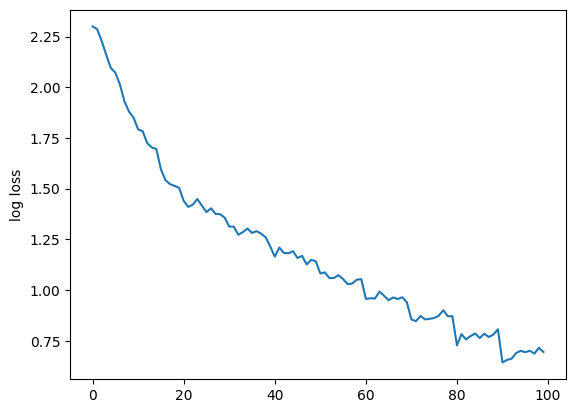

In [6]:
plt.plot(conv_losses);
plt.ylabel('log loss');

In [7]:
print(f'Baseline accuracy of the convolutional model is {test_conv(ConvNet)*100} %')

Files already downloaded and verified
Baseline accuracy of the convolutional model is 64.4 %


## Momentum Contrast

### Pre-Training the Encoder

In [8]:
encoder_args = TrainArgs(epochs = 20)

In [9]:
encoder, enc_losses = train_encoder(encoder_args)

Files already downloaded and verified
Files already downloaded and verified
Train Epoch: 1 	Loss: 0.033361
Train Epoch: 2 	Loss: 0.011635
Train Epoch: 3 	Loss: 0.006434
Train Epoch: 4 	Loss: 0.004704
Train Epoch: 5 	Loss: 0.003869
Train Epoch: 6 	Loss: 0.003415
Train Epoch: 7 	Loss: 0.003084
Train Epoch: 8 	Loss: 0.002897
Train Epoch: 9 	Loss: 0.002690
Train Epoch: 10 	Loss: 0.002526
Train Epoch: 11 	Loss: 0.002403
Train Epoch: 12 	Loss: 0.002308
Train Epoch: 13 	Loss: 0.002201
Train Epoch: 14 	Loss: 0.002090
Train Epoch: 15 	Loss: 0.001994
Train Epoch: 16 	Loss: 0.001947
Train Epoch: 17 	Loss: 0.001899
Train Epoch: 18 	Loss: 0.001794
Train Epoch: 19 	Loss: 0.001783
Train Epoch: 20 	Loss: 0.001751


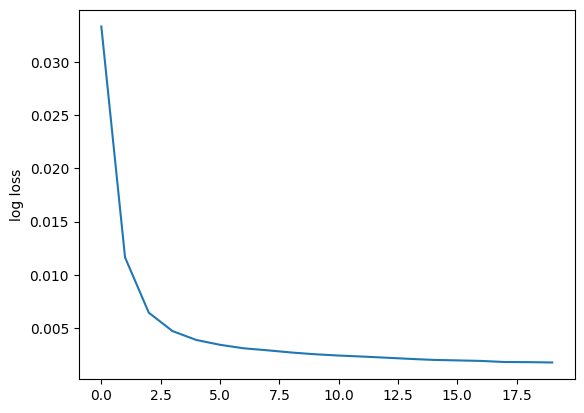

In [10]:
plt.plot(enc_losses);
plt.ylabel('log loss');

### Visualizing Embeddings

To do:
1. Implement multiple training ratios
2. Hyperparameter tuning?
3. Plot the loss functions

In [13]:
data, targets = encode_data()

Files already downloaded and verified


100%|██████████| 10000/10000 [01:46<00:00, 93.91it/s]


In [14]:
ret = TSNE(n_components=2, random_state=0, n_jobs=8).fit_transform(data)

Files already downloaded and verified


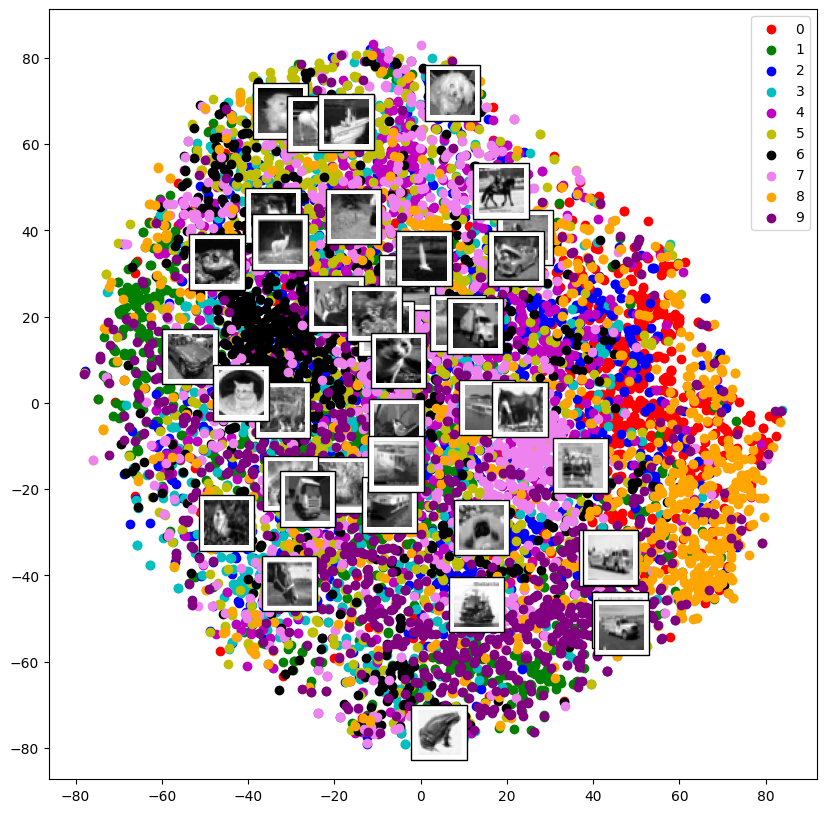

In [15]:
plot_tsne(targets, ret)

### Training SVM on freezed features

In [16]:
X_train, y_train = encode_data(train=True)
X_test, y_test = encode_data(train=False)

Files already downloaded and verified


100%|██████████| 50000/50000 [08:54<00:00, 93.54it/s] 


Files already downloaded and verified


100%|██████████| 10000/10000 [01:46<00:00, 93.95it/s]


In [17]:
svm = SVC(C = 100,  gamma='scale')
svm.fit(X_train, y_train)

SVC(C=100)

In [18]:
svm.score(X_test, y_test)

0.6328

### Multiple Runs

In [19]:
# subsample so things run faster
X_train, y_train = encode_data(train=True, subsample = True)
X_test, y_test = encode_data(train=False, subsample = True)

Files already downloaded and verified


100%|██████████| 5000/5000 [00:53<00:00, 93.32it/s]


Files already downloaded and verified


100%|██████████| 1000/1000 [00:10<00:00, 94.96it/s]


In [20]:
conv_args = TrainArgs(batchsize = 10, epochs = 5)

In [21]:
n = 3
conv_errors = []
svm_errors = []
for i in range(n):
    ConvNet, conv_losses = train_ConvNet(conv_args, subsample=True)
    conv_errors.append(test_conv(ConvNet, subsample=True)*100)
    
    svm = SVC(C = 100,  gamma='scale')
    svm.fit(X_train, y_train)   
    svm_errors.append(svm.score(X_test, y_test))

Files already downloaded and verified
Started looping
[epoch: 0, i:   499] avg mini-batch loss: 2.301
[epoch: 1, i:   499] avg mini-batch loss: 2.290


[epoch: 2, i:   499] avg mini-batch loss: 2.248
[epoch: 3, i:   499] avg mini-batch loss: 2.158
[epoch: 4, i:   499] avg mini-batch loss: 2.100
Files already downloaded and verified
Files already downloaded and verified
Started looping
[epoch: 0, i:   499] avg mini-batch loss: 2.302
[epoch: 1, i:   499] avg mini-batch loss: 2.301
[epoch: 2, i:   499] avg mini-batch loss: 2.299
[epoch: 3, i:   499] avg mini-batch loss: 2.296
[epoch: 4, i:   499] avg mini-batch loss: 2.291
Files already downloaded and verified
Files already downloaded and verified
Started looping
[epoch: 0, i:   499] avg mini-batch loss: 2.302
[epoch: 1, i:   499] avg mini-batch loss: 2.298
[epoch: 2, i:   499] avg mini-batch loss: 2.289
[epoch: 3, i:   499] avg mini-batch loss: 2.260
[epoch: 4, i:   499] avg mini-batch loss: 2.192
Files already downloaded and verified


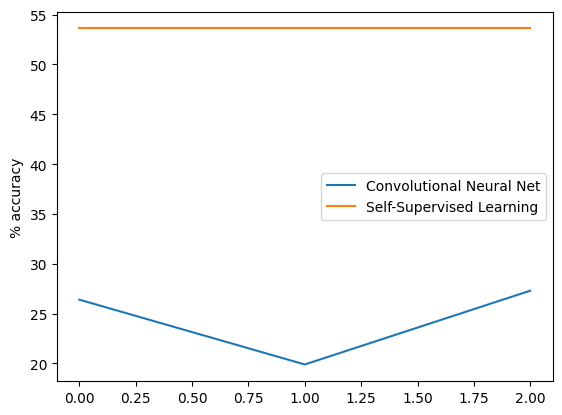

In [22]:
plt.plot(np.array(conv_errors), label="Convolutional Neural Net")
plt.plot(np.array(svm_errors)*100, label="Self-Supervised Learning")
plt.xlabel('run') # number of runs. What are runs? Runs are the number of times we train the model and test it. Why are runs in decimals? Because we are using a subsample of the data.
plt.legend()
plt.ylabel('% accuracy')
plt.savefig('./results/comparison.png')

In [23]:
conv_errors

[26.400000000000002, 19.900000000000002, 27.3]

In [24]:
svm_errors

[0.536, 0.536, 0.536]

In [25]:
conv_errors

[26.400000000000002, 19.900000000000002, 27.3]